## Credit card score

In [388]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [389]:
#we can see the file without load it
!head data/CreditScoring.csv

"Status","Seniority","Home","Time","Age","Marital","Records","Job","Expenses","Income","Assets","Debt","Amount","Price"
1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
1,0,1,36,26,1,1,1,46,107,0,0,310,910
1,1,2,60,36,2,1,1,75,214,3500,0,650,1645
1,29,2,60,44,2,1,1,75,125,10000,0,1600,1800
1,9,5,12,27,1,1,1,35,80,0,0,200,1093
1,0,2,60,32,2,1,3,90,107,15000,0,1200,1957


In [390]:
df = pd.read_csv('data/CreditScoring.csv')
df.head()

Status  Seniority  Home  Time  Age  Marital  Records  Job  Expenses  \
0       1          9     1    60   30        2        1    3        73   
1       1         17     1    60   58        3        1    1        48   
2       2         10     2    36   46        2        2    3        90   
3       1          0     1    60   24        1        1    1        63   
4       1          0     1    36   26        1        1    1        46   

   Income  Assets  Debt  Amount  Price  
0     129       0     0     800    846  
1     131       0     0    1000   1658  
2     200    3000     0    2000   2985  
3     182    2500     0     900   1325  
4     107       0     0     310    910

In [391]:
df.columns

Index(['Status', 'Seniority', 'Home', 'Time', 'Age', 'Marital', 'Records',
       'Job', 'Expenses', 'Income', 'Assets', 'Debt', 'Amount', 'Price'],
      dtype='object')

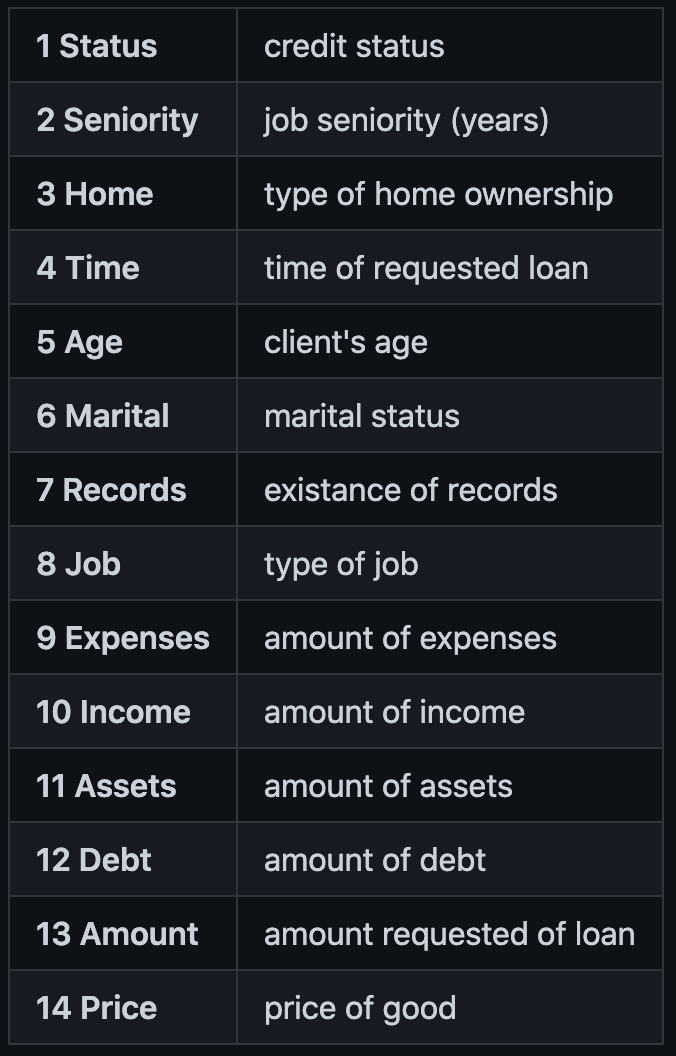

In [392]:
df.columns = df.columns.str.lower().str.strip()
df.columns

Index(['status', 'seniority', 'home', 'time', 'age', 'marital', 'records',
       'job', 'expenses', 'income', 'assets', 'debt', 'amount', 'price'],
      dtype='object')

In [393]:
df.isnull().sum()

status       0
seniority    0
home         0
time         0
age          0
marital      0
records      0
job          0
expenses     0
income       0
assets       0
debt         0
amount       0
price        0
dtype: int64

In [394]:
# this time we are going to convert numbers into categorical variables
status_values = {
    1:'ok', 
    2:'default', 
    0:'unk'
}

df.status = df.status.map(status_values)
df.head()

status  seniority  home  time  age  marital  records  job  expenses  \
0       ok          9     1    60   30        2        1    3        73   
1       ok         17     1    60   58        3        1    1        48   
2  default         10     2    36   46        2        2    3        90   
3       ok          0     1    60   24        1        1    1        63   
4       ok          0     1    36   26        1        1    1        46   

   income  assets  debt  amount  price  
0     129       0     0     800    846  
1     131       0     0    1000   1658  
2     200    3000     0    2000   2985  
3     182    2500     0     900   1325  
4     107       0     0     310    910

In [395]:
home_values = {
    1:'rent', 
    2:'owner', 
    3:'private',
    4:'ignore',
    5:'parents',
    6:'other',
    0:'unk'
}

df.home =  df.home.map(home_values)

marital_values = {
    1:'single', 
    2:'married', 
    3:'widow',
    4:'separated',
    5:'divorced',
    0:'unk'
}

df.marital = df.marital.map(marital_values)

record_values = {
    1:'no', 
    2:'yes', 
    0:'unk',
}

df.records = df.records.map(record_values)

job_values = {
    1:'fixed', 
    2:'partime', 
    3:'freelance',
    4:'other',
    0:'unk'
}

df.job = df.job.map(job_values)

df.head()

status  seniority   home  time  age  marital records        job  expenses  \
0       ok          9   rent    60   30  married      no  freelance        73   
1       ok         17   rent    60   58    widow      no      fixed        48   
2  default         10  owner    36   46  married     yes  freelance        90   
3       ok          0   rent    60   24   single      no      fixed        63   
4       ok          0   rent    36   26   single      no      fixed        46   

   income  assets  debt  amount  price  
0     129       0     0     800    846  
1     131       0     0    1000   1658  
2     200    3000     0    2000   2985  
3     182    2500     0     900   1325  
4     107       0     0     310    910

In [396]:
df.dtypes

status       object
seniority     int64
home         object
time          int64
age           int64
marital      object
records      object
job          object
expenses      int64
income        int64
assets        int64
debt          int64
amount        int64
price         int64
dtype: object

In [397]:
df.describe().round()

seniority    time     age  expenses      income      assets  \
count     4455.0  4455.0  4455.0    4455.0      4455.0      4455.0   
mean         8.0    46.0    37.0      56.0    763317.0   1060341.0   
std          8.0    15.0    11.0      20.0   8703625.0  10217569.0   
min          0.0     6.0    18.0      35.0         0.0         0.0   
25%          2.0    36.0    28.0      35.0        80.0         0.0   
50%          5.0    48.0    36.0      51.0       120.0      3500.0   
75%         12.0    60.0    45.0      72.0       166.0      6000.0   
max         48.0    72.0    68.0     180.0  99999999.0  99999999.0   

             debt  amount    price  
count      4455.0  4455.0   4455.0  
mean     404382.0  1039.0   1463.0  
std     6344253.0   475.0    628.0  
min           0.0   100.0    105.0  
25%           0.0   700.0   1118.0  
50%           0.0  1000.0   1400.0  
75%           0.0  1300.0   1692.0  
max    99999999.0  5000.0  11140.0

In [398]:
#those are missing values
df.income.max()

99999999

In [399]:
for c in['income','assets','debt']:
    df[c].replace(to_replace=99999999, value=np.nan, inplace=True)

In [400]:
df.describe()

seniority         time          age     expenses       income  \
count  4455.000000  4455.000000  4455.000000  4455.000000  4421.000000   
mean      7.987205    46.441751    37.077666    55.568799   130.568197   
std       8.173444    14.655225    10.984856    19.515878    86.367434   
min       0.000000     6.000000    18.000000    35.000000     0.000000   
25%       2.000000    36.000000    28.000000    35.000000    80.000000   
50%       5.000000    48.000000    36.000000    51.000000   120.000000   
75%      12.000000    60.000000    45.000000    72.000000   165.000000   
max      48.000000    72.000000    68.000000   180.000000   959.000000   

              assets          debt       amount         price  
count    4408.000000   4437.000000  4455.000000   4455.000000  
mean     5403.433984    342.948614  1039.021773   1462.875645  
std     11573.161523   1245.861736   474.543007    628.089913  
min         0.000000      0.000000   100.000000    105.000000  
25%         0.000000      0.000000   700.000000   1117.500000  
50%      3000.000000      0.000000  1000.000000   1400.000000  
75%      6000.000000      0.000000  1300.000000   1692.000000  
max    300000.000000  30000.000000  5000.000000  11140.000000

In [401]:
df.status.value_counts()

ok         3200
default    1254
unk           1
Name: status, dtype: int64

In [402]:
df = df[df['status'] != 'unk'].copy()

In [403]:
df.reset_index()

index   status  seniority   home  time  age  marital records        job  \
0         0       ok          9   rent    60   30  married      no  freelance   
1         1       ok         17   rent    60   58    widow      no      fixed   
2         2  default         10  owner    36   46  married     yes  freelance   
3         3       ok          0   rent    60   24   single      no      fixed   
4         4       ok          0   rent    36   26   single      no      fixed   
...     ...      ...        ...    ...   ...  ...      ...     ...        ...   
4449   4450  default          1   rent    60   39  married      no      fixed   
4450   4451       ok         22  owner    60   46  married      no      fixed   
4451   4452  default          0  owner    24   37  married      no    partime   
4452   4453       ok          0   rent    48   23   single      no  freelance   
4453   4454       ok          5  owner    60   32  married      no  freelance   

      expenses  income  assets    debt  amount  price  
0           73   129.0     0.0     0.0     800    846  
1           48   131.0     0.0     0.0    1000   1658  
2           90   200.0  3000.0     0.0    2000   2985  
3           63   182.0  2500.0     0.0     900   1325  
4           46   107.0     0.0     0.0     310    910  
...        ...     ...     ...     ...     ...    ...  
4449        69    92.0     0.0     0.0     900   1020  
4450        60    75.0  3000.0   600.0     950   1263  
4451        60    90.0  3500.0     0.0     500    963  
4452        49   140.0     0.0     0.0     550    550  
4453        60   140.0  4000.0  1000.0    1350   1650  

[4454 rows x 15 columns]

In [404]:
#now we want to split our dataset for training
from sklearn.model_selection import train_test_split

X, y = train_test_split(df, test_size=0.2, random_state=11)

#now we are going to split the dataframe train and validation

df_train, df_val = train_test_split(X, test_size=0.2, random_state=11)

In [405]:
df_train.reset_index(drop=True, inplace=True)
df_val.reset_index(drop=True, inplace=True)
y.reset_index(drop=True, inplace=True)

In [406]:
df_test = y
df_test

status  seniority   home  time  age  marital records        job  \
0    default          3  owner    36   26   single      no  freelance   
1         ok         10   rent    60   28  married      no      fixed   
2         ok         14   rent    60   41  married      no      fixed   
3         ok          4  owner    60   39  married      no  freelance   
4    default          1  other    30   20   single      no      fixed   
..       ...        ...    ...   ...  ...      ...     ...        ...   
886       ok         19  owner    12   42  married      no      fixed   
887       ok          7  owner    36   24  married      no      fixed   
888       ok          0  owner    24   28  married      no    partime   
889  default          8  other    36   30  married     yes  freelance   
890       ok          4  owner    24   49  married      no      fixed   

     expenses  income   assets    debt  amount  price  
0          35     0.0  60000.0  3000.0     800   1000  
1          78   325.0     18.0  3000.0    2250   2250  
2          53   181.0      0.0     0.0    1150   2497  
3          45     0.0   7500.0     0.0    1300   1508  
4          35    90.0      0.0     0.0     450    500  
..        ...     ...      ...     ...     ...    ...  
886        90   464.0   5000.0     0.0    1100   2413  
887        45    95.0   3000.0     0.0    1000   1597  
888        45   219.0   6000.0     0.0     600    943  
889        75   100.0   4000.0  1365.0    1220   1745  
890        45   132.0  15000.0     0.0     850   1338  

[891 rows x 14 columns]

In [407]:
y_train = (df_train.status == 'default').astype('int').values
y_val = (df_val.status == 'default').astype('int').values
y_test = (df_test == 'default').astype('int').values

In [408]:
del df_train['status']
del df_val['status']
del df_test['status']


In [409]:
df_train

seniority     home  time  age  marital records        job  expenses  \
0            15    owner    60   34  married      no      fixed        45   
1             7  parents    60   30   single      no      fixed        35   
2            10    owner    36   47  married      no      fixed        60   
3             5    owner    48   39  married     yes  freelance        45   
4            14    owner    36   40  married      no      fixed        45   
...         ...      ...   ...  ...      ...     ...        ...       ...   
2845         18  private    36   45  married      no      fixed        45   
2846          7  private    60   29  married      no      fixed        60   
2847          1  parents    24   19   single      no      fixed        35   
2848         15    owner    48   43  married      no  freelance        60   
2849         12    owner    48   27  married     yes      fixed        45   

      income   assets    debt  amount  price  
0       82.0   3500.0     0.0     750   1624  
1       95.0      0.0     0.0     900   1158  
2      133.0   3000.0     0.0     360    360  
3      100.0  30000.0     0.0    1550   2294  
4       80.0   3000.0     0.0     900   1263  
...      ...      ...     ...     ...    ...  
2845   220.0  20000.0     0.0     800   1600  
2846    51.0   3500.0   500.0    1000   1290  
2847    28.0      0.0     0.0     400    600  
2848   100.0  18000.0     0.0    2500   2976  
2849   110.0   5000.0  1300.0     450   1636  

[2850 rows x 13 columns]

In [410]:
nums = [2, 7, 11, 15]
target = 9
# Output: [0, 1]
nums2 = [5, 7, 11, 4]
# Output: [0, 3]
nums3 = [3, 7, 11, 4]

nums3 = [3, 3, 11, 4]

nums4 = [ 2,3,2]

nums5 = [-1,-2,-3,-4,-5]


In [411]:
def sum_two(nums, target):
    dict_nums = {}
    for i, val in enumerate(nums):
        diff = target - val
        
        if diff in dict_nums:
            return [dict_nums[diff], i]
            
        dict_nums[val] = i
                    
        
    return []
        
    

In [412]:
sum_two(nums5, -8)

[2, 4]

# Decision trees

In [413]:
df_train.iloc[0].to_dict()

{'seniority': 15,
 'home': 'owner',
 'time': 60,
 'age': 34,
 'marital': 'married',
 'records': 'no',
 'job': 'fixed',
 'expenses': 45,
 'income': 82.0,
 'assets': 3500.0,
 'debt': 0.0,
 'amount': 750,
 'price': 1624}

In [414]:
# we can learn rules from the data

from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction import DictVectorizer

from sklearn.metrics import roc_auc_score

In [415]:
# we need to handle the nan values with zeros or other values

train_dicts = df_train.fillna(0).to_dict(orient='records')



In [416]:
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)

In [417]:
dv.get_feature_names()


['age',
 'amount',
 'assets',
 'debt',
 'expenses',
 'home=ignore',
 'home=other',
 'home=owner',
 'home=parents',
 'home=private',
 'home=rent',
 'home=unk',
 'income',
 'job=fixed',
 'job=freelance',
 'job=other',
 'job=partime',
 'job=unk',
 'marital=divorced',
 'marital=married',
 'marital=separated',
 'marital=single',
 'marital=unk',
 'marital=widow',
 'price',
 'records=no',
 'records=yes',
 'seniority',
 'time']

In [418]:
#train the decision tree
# with need  remember to fill our nan with zero

dt = DecisionTreeClassifier()

dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [419]:
val_dict = df_val.fillna(0).to_dict(orient='records')

X_val = dv.transform(val_dict)



In [420]:
X_val

array([[3.100e+01, 5.500e+02, 0.000e+00, ..., 0.000e+00, 6.000e+00,
        3.600e+01],
       [3.800e+01, 1.000e+03, 0.000e+00, ..., 0.000e+00, 1.800e+01,
        6.000e+01],
       [4.000e+01, 7.000e+02, 0.000e+00, ..., 1.000e+00, 1.700e+01,
        2.400e+01],
       ...,
       [2.800e+01, 1.055e+03, 1.750e+03, ..., 0.000e+00, 9.000e+00,
        6.000e+01],
       [6.400e+01, 9.840e+02, 9.000e+03, ..., 0.000e+00, 4.000e+00,
        6.000e+01],
       [6.100e+01, 6.000e+02, 2.500e+03, ..., 0.000e+00, 1.300e+01,
        3.600e+01]])

In [421]:
y_pred =  dt.predict_proba(X_val)[:,1]

In [422]:
roc_auc_score(y_val, y_pred)

0.6515211267605634

In [423]:
#now we can see the roc in the training set

y_pred_train = dt.predict_proba(X_train)[:,1]
roc_auc_score(y_train, y_pred_train)

1.0

In [424]:
#now we are going to retrain the decision tree
# with max deepth = 

dt = DecisionTreeClassifier(max_depth=3)

dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [425]:
# calculate y in the validation set
y_pred =  dt.predict_proba(X_val)[:,1]

In [426]:
roc_auc_score(y_val, y_pred)

0.7477511737089203

In [427]:
y_pred_train = dt.predict_proba(X_train)[:,1]
roc_auc_score(y_train, y_pred_train)

0.7700033886231307

In [428]:
dt = DecisionTreeClassifier(max_depth=5)

dt.fit(X_train, y_train) 

# calculate y in the validation set
y_pred =  dt.predict_proba(X_val)[:,1]

roc_auc_score(y_val, y_pred)

0.7698356807511737

In [429]:
y_pred_train = dt.predict_proba(X_train)[:,1]
roc_auc_score(y_train, y_pred_train)

0.8383203188768569

In [430]:
dt = DecisionTreeClassifier(max_depth=10)

dt.fit(X_train, y_train) 

# calculate y in the validation set
y_pred =  dt.predict_proba(X_val)[:,1]

roc_auc_score(y_val, y_pred)

0.7049154929577464

In [431]:
y_pred_train = dt.predict_proba(X_train)[:,1]
roc_auc_score(y_train, y_pred_train)

0.9609145819626311

In [432]:
roc_gr = []
for i in range(20):
    dt = DecisionTreeClassifier(max_depth=i+1)

    dt.fit(X_train, y_train) 

    # calculate y in the validation set
    y_pred =  dt.predict_proba(X_val)[:,1]

    val_roc = roc_auc_score(y_val, y_pred)
    
    y_pred_train = dt.predict_proba(X_train)[:,1]
    train_roc = roc_auc_score(y_train, y_pred_train)
    
    print('val-roc ', val_roc, 'train-roc', train_roc, 'depth:', i+1,'\n')
    roc_gr.append([val_roc,train_roc])

val-roc  0.6073192488262912 train-roc 0.6264061549268601 depth: 1 

val-roc  0.6759624413145541 train-roc 0.7012100105368865 depth: 2 

val-roc  0.7477511737089203 train-roc 0.7700033886231307 depth: 3 

val-roc  0.7730892018779343 train-roc 0.810346245553978 depth: 4 

val-roc  0.7698356807511737 train-roc 0.8383203188768569 depth: 5 

val-roc  0.7767840375586854 train-roc 0.8676340732239409 depth: 6 

val-roc  0.761830985915493 train-roc 0.8946295888635497 depth: 7 

val-roc  0.7442018779342723 train-roc 0.9216857039679046 depth: 8 

val-roc  0.7167887323943662 train-roc 0.9450418507323878 depth: 9 

val-roc  0.7173427230046949 train-roc 0.9609145819626311 depth: 10 

val-roc  0.7147699530516431 train-roc 0.9768834684660174 depth: 11 

val-roc  0.6901220657276996 train-roc 0.9878460971471255 depth: 12 

val-roc  0.6962394366197183 train-roc 0.9938071057200947 depth: 13 

val-roc  0.6781361502347418 train-roc 0.9970878247018259 depth: 14 

val-roc  0.6724976525821597 train-roc 0.99829

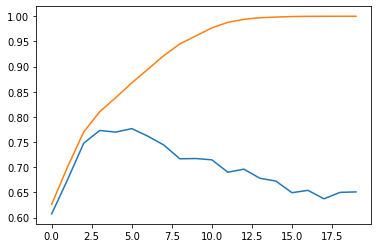

In [433]:
plt.plot(roc_gr)

In [434]:
cf = pd.DataFrame(roc_gr, columns=['test', "train"])

<AxesSubplot:>

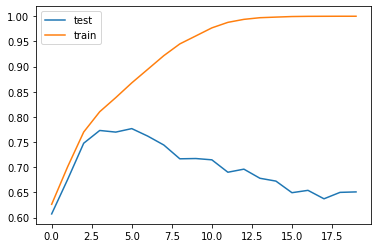

In [435]:
# now check the bias vs variance
cf.plot()

In [436]:
# now check the rules learned
from sklearn.tree import export_text

In [437]:
dt = DecisionTreeClassifier(max_depth=3)

dt.fit(X_train, y_train) 

# calculate y in the validation set
y_pred =  dt.predict_proba(X_val)[:,1]

val_roc = roc_auc_score(y_val, y_pred)

y_pred_train = dt.predict_proba(X_train)[:,1]
train_roc = roc_auc_score(y_train, y_pred_train)

print(export_text(dt, feature_names=dv.get_feature_names()))

|--- records=no <= 0.50
|   |--- seniority <= 6.50
|   |   |--- seniority <= 1.50
|   |   |   |--- class: 1
|   |   |--- seniority >  1.50
|   |   |   |--- class: 1
|   |--- seniority >  6.50
|   |   |--- income <= 103.50
|   |   |   |--- class: 1
|   |   |--- income >  103.50
|   |   |   |--- class: 0
|--- records=no >  0.50
|   |--- job=partime <= 0.50
|   |   |--- income <= 74.50
|   |   |   |--- class: 0
|   |   |--- income >  74.50
|   |   |   |--- class: 0
|   |--- job=partime >  0.50
|   |   |--- assets <= 8750.00
|   |   |   |--- class: 1
|   |   |--- assets >  8750.00
|   |   |   |--- class: 0



# now how does it work decision tree


In [438]:
data = [
    [8000, 'default'],
    [2000, 'default'],
    [0, 'default'],
    [5000, 'ok'],
    [5000, 'ok'],
    [4000, 'ok'],
    [9000, 'ok'],
    [3000, 'default'],
]

In [439]:
df_exmple = pd.DataFrame(data, columns=['assets','status'])
df_exmple


assets   status
0    8000  default
1    2000  default
2       0  default
3    5000       ok
4    5000       ok
5    4000       ok
6    9000       ok
7    3000  default

In [440]:
df_exmple.sort_values('assets')

assets   status
2       0  default
1    2000  default
7    3000  default
5    4000       ok
3    5000       ok
4    5000       ok
0    8000  default
6    9000       ok

In [441]:
ts = [2000,3000,4000,5000,8000]

In [442]:
for t in ts:
    df_left = df_exmple[df_exmple.assets <= t]
    df_right = df_exmple[df_exmple.assets > t]
    
    print('asset split as {} '.format(t))
    
    display(df_left)
    print(df_left.status.value_counts(normalize=True))
    display(df_right)
    print(df_right.status.value_counts(normalize=True))
    
    

asset split as 2000 


assets   status
1    2000  default
2       0  default

default    1.0
Name: status, dtype: float64


assets   status
0    8000  default
3    5000       ok
4    5000       ok
5    4000       ok
6    9000       ok
7    3000  default

ok         0.666667
default    0.333333
Name: status, dtype: float64
asset split as 3000 


assets   status
1    2000  default
2       0  default
7    3000  default

default    1.0
Name: status, dtype: float64


assets   status
0    8000  default
3    5000       ok
4    5000       ok
5    4000       ok
6    9000       ok

ok         0.8
default    0.2
Name: status, dtype: float64
asset split as 4000 


assets   status
1    2000  default
2       0  default
5    4000       ok
7    3000  default

default    0.75
ok         0.25
Name: status, dtype: float64


assets   status
0    8000  default
3    5000       ok
4    5000       ok
6    9000       ok

ok         0.75
default    0.25
Name: status, dtype: float64
asset split as 5000 


assets   status
1    2000  default
2       0  default
3    5000       ok
4    5000       ok
5    4000       ok
7    3000  default

default    0.5
ok         0.5
Name: status, dtype: float64


assets   status
0    8000  default
6    9000       ok

default    0.5
ok         0.5
Name: status, dtype: float64
asset split as 8000 


assets   status
0    8000  default
1    2000  default
2       0  default
3    5000       ok
4    5000       ok
5    4000       ok
7    3000  default

default    0.571429
ok         0.428571
Name: status, dtype: float64


assets status
6    9000     ok

ok    1.0
Name: status, dtype: float64


# tuning parameters

- max_depth
-min_samples_leaf


In [443]:
for d in [1,2,3,4,5,6,7,10,15,20, None]:
    dt = DecisionTreeClassifier(max_depth=d)
    dt.fit(X_train, y_train)
    
    y_pred = dt.predict_proba(X_val)[:,1]
    auc = roc_auc_score(y_val, y_pred)
    
    print('depth: {} -> auc: {}'.format(d, round(auc, 3)))

depth: 1 -> auc: 0.607
depth: 2 -> auc: 0.676
depth: 3 -> auc: 0.748
depth: 4 -> auc: 0.773
depth: 5 -> auc: 0.77
depth: 6 -> auc: 0.777
depth: 7 -> auc: 0.764
depth: 10 -> auc: 0.711
depth: 15 -> auc: 0.663
depth: 20 -> auc: 0.643
depth: None -> auc: 0.638


In [444]:
data_min_dept = []
for d in [4,5,6,7,9,15,20, None]:
    for s in [1,2,3,5,10,15,20,25,30,100]:
        dt = DecisionTreeClassifier(max_depth=d, min_samples_leaf=s)
        dt.fit(X_train, y_train)

        y_pred = dt.predict_proba(X_val)[:,1]
        auc = roc_auc_score(y_val, y_pred)
        data_min_dept.append([d, s, auc])
        print('depth: {}, min_sample_leaf: {} -> auc: {}'.format(d, s,round(auc ,3)))
    

depth: 4, min_sample_leaf: 1 -> auc: 0.773
depth: 4, min_sample_leaf: 2 -> auc: 0.773
depth: 4, min_sample_leaf: 3 -> auc: 0.773
depth: 4, min_sample_leaf: 5 -> auc: 0.773
depth: 4, min_sample_leaf: 10 -> auc: 0.773
depth: 4, min_sample_leaf: 15 -> auc: 0.773
depth: 4, min_sample_leaf: 20 -> auc: 0.766
depth: 4, min_sample_leaf: 25 -> auc: 0.766
depth: 4, min_sample_leaf: 30 -> auc: 0.766
depth: 4, min_sample_leaf: 100 -> auc: 0.767
depth: 5, min_sample_leaf: 1 -> auc: 0.77
depth: 5, min_sample_leaf: 2 -> auc: 0.77
depth: 5, min_sample_leaf: 3 -> auc: 0.77
depth: 5, min_sample_leaf: 5 -> auc: 0.771
depth: 5, min_sample_leaf: 10 -> auc: 0.769
depth: 5, min_sample_leaf: 15 -> auc: 0.776
depth: 5, min_sample_leaf: 20 -> auc: 0.784
depth: 5, min_sample_leaf: 25 -> auc: 0.781
depth: 5, min_sample_leaf: 30 -> auc: 0.779
depth: 5, min_sample_leaf: 100 -> auc: 0.78
depth: 6, min_sample_leaf: 1 -> auc: 0.781
depth: 6, min_sample_leaf: 2 -> auc: 0.776
depth: 6, min_sample_leaf: 3 -> auc: 0.774
d

In [445]:
cf_data.sort_values(by='auc', ascending=False).head()

depth  leaves       auc
57   15.0      25  0.797221
67   20.0      25  0.796235
77    NaN      25  0.795258
47    9.0      25  0.794446
78    NaN      30  0.793258

In [446]:
cf_pivot = cf_data.pivot(index='leaves', columns=['depth'], values=['auc'])
cf_pivot

auc                                                              \
depth        NaN      4.0       5.0       6.0       7.0       9.0       15.0   
leaves                                                                         
1       0.651826  0.773089  0.769836  0.780962  0.770512  0.732155  0.665554   
2       0.679784  0.773089  0.769836  0.775939  0.760408  0.727122  0.686357   
3       0.692540  0.773089  0.769836  0.778390  0.755202  0.737000  0.693474   
5       0.724596  0.773089  0.770709  0.777685  0.769446  0.757371  0.721023   
10      0.745869  0.773089  0.769549  0.776089  0.768469  0.751131  0.751808   
15      0.782291  0.773413  0.776052  0.783469  0.781549  0.782155  0.784676   
20      0.786648  0.766479  0.784122  0.792014  0.790864  0.789019  0.791718   
25      0.795258  0.765887  0.780897  0.789685  0.786479  0.794446  0.797221   
30      0.793258  0.765793  0.778667  0.789028  0.786643  0.791671  0.792770   
100     0.783826  0.766854  0.780474  0.783000  0.782446  0.784178  0.783451   

                  
depth       20.0  
leaves            
1       0.649479  
2       0.683587  
3       0.692329  
5       0.720817  
10      0.747573  
15      0.785437  
20      0.787742  
25      0.796235  
30      0.791765  
100     0.783826

<AxesSubplot:xlabel='leaves'>

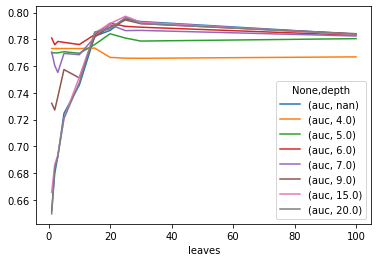

In [447]:
cf_pivot.plot()

In [448]:
cf_pivot.round(3)


auc                                                 
depth     NaN   4.0    5.0    6.0    7.0    9.0    15.0   20.0
leaves                                                        
1       0.652  0.773  0.770  0.781  0.771  0.732  0.666  0.649
2       0.680  0.773  0.770  0.776  0.760  0.727  0.686  0.684
3       0.693  0.773  0.770  0.778  0.755  0.737  0.693  0.692
5       0.725  0.773  0.771  0.778  0.769  0.757  0.721  0.721
10      0.746  0.773  0.770  0.776  0.768  0.751  0.752  0.748
15      0.782  0.773  0.776  0.783  0.782  0.782  0.785  0.785
20      0.787  0.766  0.784  0.792  0.791  0.789  0.792  0.788
25      0.795  0.766  0.781  0.790  0.786  0.794  0.797  0.796
30      0.793  0.766  0.779  0.789  0.787  0.792  0.793  0.792
100     0.784  0.767  0.780  0.783  0.782  0.784  0.783  0.784

<AxesSubplot:xlabel='None-depth', ylabel='leaves'>

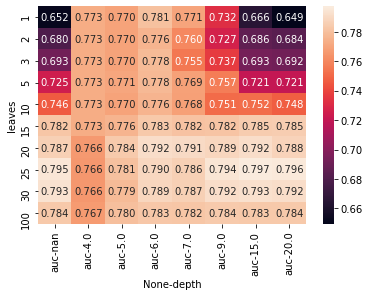

In [449]:
sns.heatmap(cf_pivot, annot=True, fmt='.3f')

In [450]:
dt = DecisionTreeClassifier(max_depth=7, min_samples_leaf=15)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7, min_samples_leaf=15)

In [451]:
y_pred_train = dt.predict_proba(X_train)[:,1]
roc_auc_score(y_train, y_pred_train)

0.8737771893720906

In [452]:
y_pred_test = dt.predict_proba(X_val)[:,1]
roc_auc_score(y_val, y_pred_test)

0.7790798122065727

<AxesSubplot:xlabel='leaves'>

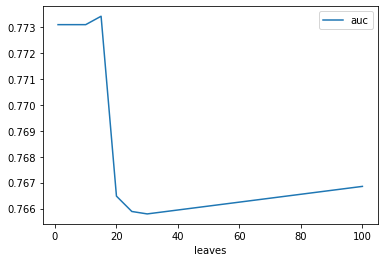

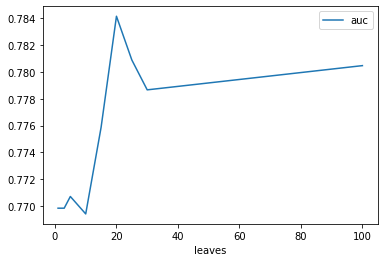

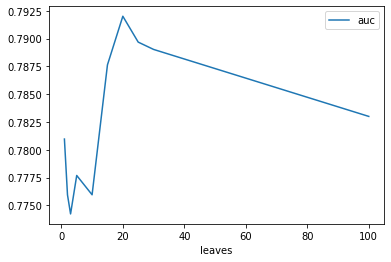

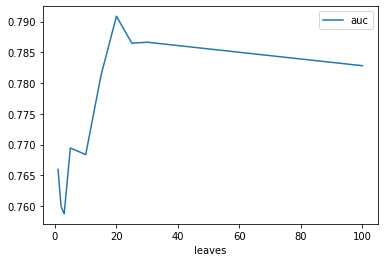

In [453]:
cf_data = pd.DataFrame(data_min_dept, columns=['depth','leaves','auc'])
cf_data[cf_data['depth']== 4].plot(x='leaves', y='auc')
cf_data[cf_data['depth']== 5].plot(x='leaves', y='auc')
cf_data[cf_data['depth']== 6].plot(x='leaves', y='auc')
cf_data[cf_data['depth']== 7].plot(x='leaves', y='auc')

# Random forest

In [454]:
from sklearn.ensemble import RandomForestClassifier


In [455]:
rf = RandomForestClassifier(n_estimators=10, random_state=1)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=1)

In [456]:
y_pred = rf.predict_proba(X_val)[:,1]
roc_auc_score(y_val, y_pred)

0.7806384976525822

## each time we train the model the result is different, then we need to use random_state=1, or equal some seed

In [457]:
rf.predict_proba(X_val[[0]])

array([[0.7, 0.3]])

In [458]:
data_rf = []
for n in range(10,201,10):
    rf = RandomForestClassifier(n_estimators=n, random_state=1)
    rf.fit(X_train, y_train)
    y_pred = rf.predict_proba(X_val)[:,1]
    y_pred_train = rf.predict_proba(X_train)[:,1]
    auc = roc_auc_score(y_val, y_pred)
    auc_train = roc_auc_score(y_train, y_pred_train)
    data_rf.append([auc, auc_train , n])
    print(auc, auc_train, n)

0.7806384976525822 0.9993701984199617 10
0.8036572769953052 0.9999870144004116 20
0.8140140845070422 0.9999870144004115 30
0.8112910798122066 1.0 40
0.8138309859154929 1.0 50
0.8108403755868544 1.0 60
0.8132816901408451 1.0 70
0.8149671361502349 1.0 80
0.8177323943661972 1.0 90
0.8200140845070423 1.0 100
0.8189014084507042 1.0 110
0.8200187793427229 1.0 120
0.8209577464788732 0.9999999999999999 130
0.8205727699530516 1.0 140
0.8201596244131454 1.0 150
0.8204272300469483 1.0 160
0.8212582159624413 1.0 170
0.8214507042253522 1.0 180
0.8209154929577466 1.0 190
0.8210704225352112 1.0 200


<AxesSubplot:xlabel='estimators'>

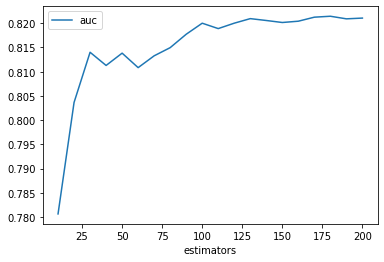

In [459]:
df_rf = pd.DataFrame(data_rf, columns=['auc', 'auc_train','estimators'])
df_rf.plot(x='estimators', y='auc')

<AxesSubplot:xlabel='estimators'>

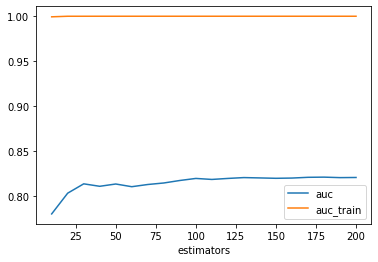

In [460]:
df_rf.plot(x='estimators')

# tunning

In [477]:
data_rf = []
for d in [5,10,15]:
    for n in range(10,201,10):
        rf = RandomForestClassifier(n_estimators=n,max_depth=d ,random_state=1)
        rf.fit(X_train, y_train)
        y_pred = rf.predict_proba(X_val)[:,1]
        y_pred_train = rf.predict_proba(X_train)[:,1]
        auc = roc_auc_score(y_val, y_pred)
        auc_train = roc_auc_score(y_train, y_pred_train)
        data_rf.append([auc, auc_train , n, d])
        print('auc: {}, auc_train: {}, n: {}, d: {}'.format(auc, auc_train, n, d))
              
              

auc: 0.812131455399061, auc_train: 0.8652478147090978, n: 10, d: 5
auc: 0.8127183098591548, auc_train: 0.8716095217836525, n: 20, d: 5
auc: 0.8165680751173708, auc_train: 0.872061235140764, n: 30, d: 5
auc: 0.8137136150234741, auc_train: 0.8714354529129791, n: 40, d: 5
auc: 0.8138262910798122, auc_train: 0.8704841031526562, n: 50, d: 5
auc: 0.8156103286384977, auc_train: 0.8721555353282511, n: 60, d: 5
auc: 0.8160892018779342, auc_train: 0.8714506027791656, n: 70, d: 5
auc: 0.815056338028169, auc_train: 0.8703375513858725, n: 80, d: 5
auc: 0.8149530516431924, auc_train: 0.8703029231203036, n: 90, d: 5
auc: 0.8146244131455398, auc_train: 0.8706788871464826, n: 100, d: 5
auc: 0.8154319248826291, auc_train: 0.8708681058833423, n: 110, d: 5
auc: 0.8157887323943662, auc_train: 0.8711358565796177, n: 120, d: 5
auc: 0.8160422535211268, auc_train: 0.8709361256907102, n: 130, d: 5
auc: 0.8158262910798123, auc_train: 0.8707363948018025, n: 140, d: 5
auc: 0.8152159624413146, auc_train: 0.87081925

<AxesSubplot:xlabel='estimators'>

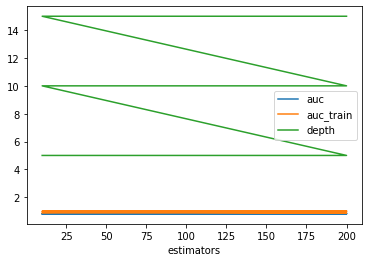

In [478]:
df_rf = pd.DataFrame(data_rf, columns=['auc', 'auc_train','estimators', 'depth'])
df_rf.plot(x='estimators')



In [479]:
df_rf.head()

auc  auc_train  estimators  depth
0  0.812131   0.865248          10      5
1  0.812718   0.871610          20      5
2  0.816568   0.872061          30      5
3  0.813714   0.871435          40      5
4  0.813826   0.870484          50      5

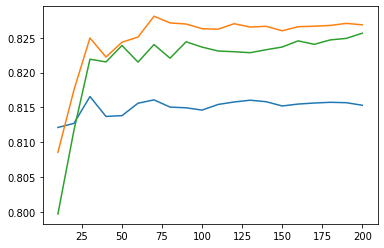

In [480]:
for d in [5, 10, 15]:
    df_subset = df_rf[df_rf.depth == d]
    plt.plot(df_subset.estimators, df_subset.auc, label= d)
    
    

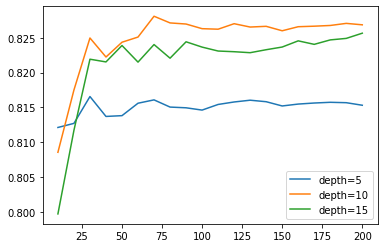

In [481]:
for d in [5, 10, 15]:
    df_subset = df_rf[df_rf.depth == d]
    plt.plot(df_subset.estimators, df_subset.auc, label='depth=%d' % d)

plt.legend()

In [482]:
cf_pivot = df_rf.pivot(index='estimators', columns=['depth'], values=['auc'])
cf_pivot

auc                    
depth             5         10        15
estimators                              
10          0.812131  0.808568  0.799728
20          0.812718  0.817507  0.811723
30          0.816568  0.824972  0.821925
40          0.813714  0.822239  0.821535
50          0.813826  0.824362  0.823892
60          0.815610  0.825103  0.821507
70          0.816089  0.828089  0.824028
80          0.815056  0.827131  0.822070
90          0.814953  0.826972  0.824423
100         0.814624  0.826305  0.823662
110         0.815432  0.826230  0.823099
120         0.815789  0.827019  0.823000
130         0.816042  0.826540  0.822859
140         0.815826  0.826643  0.823286
150         0.815216  0.826005  0.823671
160         0.815488  0.826587  0.824559
170         0.815638  0.826662  0.824056
180         0.815742  0.826765  0.824695
190         0.815685  0.827066  0.824911
200         0.815319  0.826859  0.825657

<AxesSubplot:xlabel='estimators'>

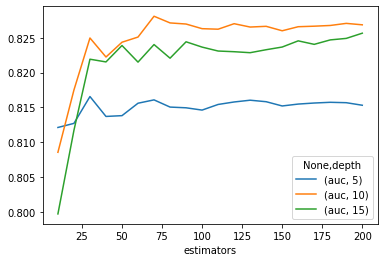

In [483]:
cf_pivot.plot()

In [485]:
data_rf = []
for d in [1,3,4,5,10,50]:
    for n in range(10,201,10):
        rf = RandomForestClassifier(n_estimators=n,max_depth=d ,random_state=1)
        rf.fit(X_train, y_train)
        y_pred = rf.predict_proba(X_val)[:,1]
        y_pred_train = rf.predict_proba(X_train)[:,1]
        auc = roc_auc_score(y_val, y_pred)
        auc_train = roc_auc_score(y_train, y_pred_train)
        data_rf.append([auc, auc_train , n, d])
        print('auc: {}, auc_train: {}, n: {}, d: {}'.format(auc, auc_train, n, d))

auc: 0.7587887323943663, auc_train: 0.7941426907151726, n: 10, d: 1
auc: 0.7647652582159624, auc_train: 0.8097934300286426, n: 20, d: 1
auc: 0.7719953051643192, auc_train: 0.8156486987192488, n: 30, d: 1
auc: 0.7773990610328638, auc_train: 0.81637465557243, n: 40, d: 1
auc: 0.7758309859154929, auc_train: 0.814364979445651, n: 50, d: 1
auc: 0.7814882629107982, auc_train: 0.8176203455900904, n: 60, d: 1
auc: 0.7895258215962442, auc_train: 0.822977523782198, n: 70, d: 1
auc: 0.7872535211267605, auc_train: 0.8211378971738388, n: 80, d: 1
auc: 0.7911596244131454, auc_train: 0.8231342785200868, n: 90, d: 1
auc: 0.7888967136150236, auc_train: 0.8219436227102059, n: 100, d: 1
auc: 0.7872347417840375, auc_train: 0.8203062004382949, n: 110, d: 1
auc: 0.7885962441314553, auc_train: 0.8215824993692709, n: 120, d: 1
auc: 0.7922582159624414, auc_train: 0.8239823618455876, n: 130, d: 1
auc: 0.7906338028169014, auc_train: 0.8227524400559987, n: 140, d: 1
auc: 0.7892347417840376, auc_train: 0.821722558

<AxesSubplot:xlabel='estimators'>

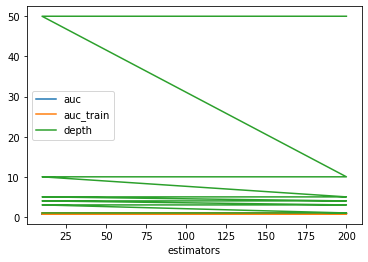

In [486]:
df_rf = pd.DataFrame(data_rf, columns=['auc', 'auc_train','estimators', 'depth'])
df_rf.plot(x='estimators')

In [491]:
colors = ['black', 'blue', 'orange', 'red', 'grey']
min_sanples = [1,3,5,10,50]

#list(zip(min_sanples, colors))

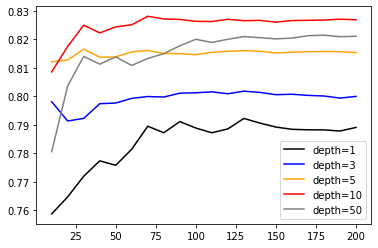

In [492]:



for d, c in zip(min_sanples, colors):
    df_subset = df_rf[df_rf.depth == d]
    plt.plot(df_subset.estimators, df_subset.auc,
             color=c,
             label='depth=%d' %d)
    
plt.legend()

In [494]:
rf = RandomForestClassifier(n_estimators=75, 
                            max_depth=10,
                            min_samples_leaf=3,
                            random_state=1)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=3, n_estimators=75,
                       random_state=1)

# Gradient Boosting

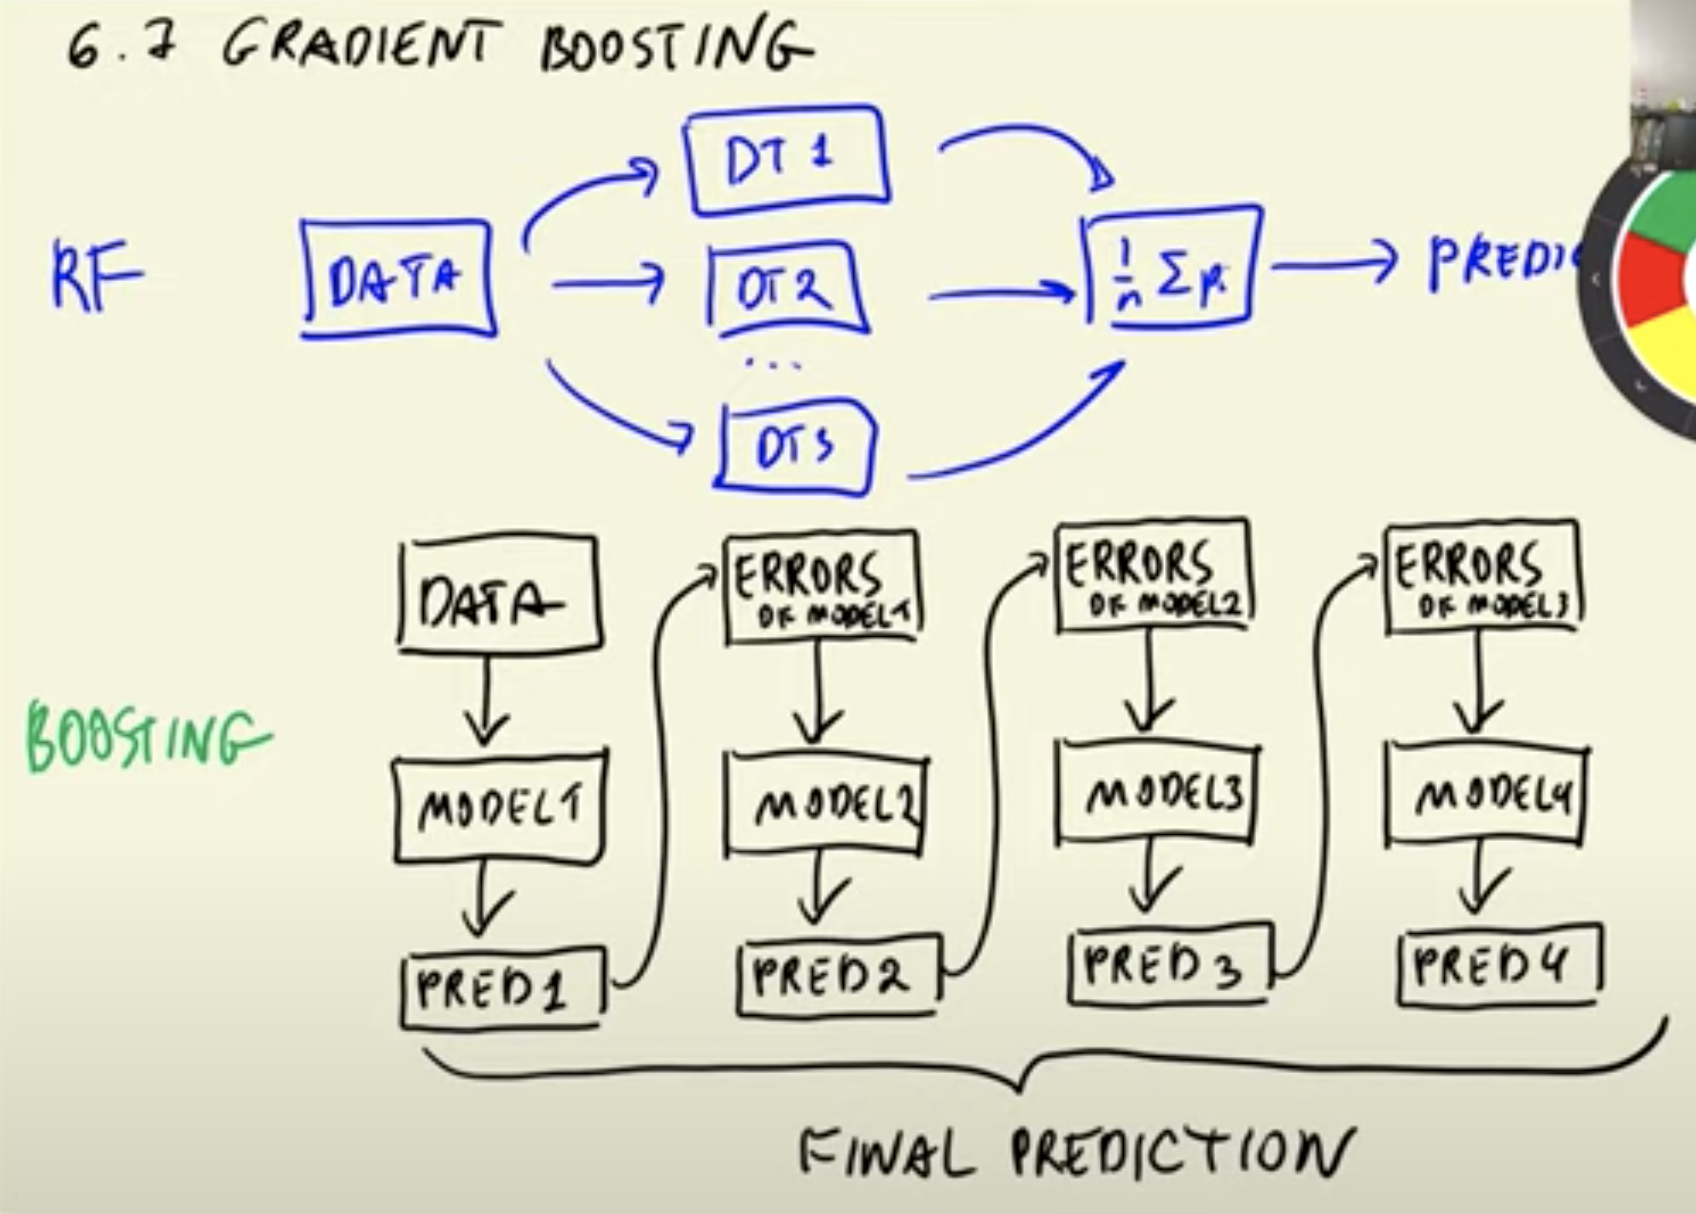

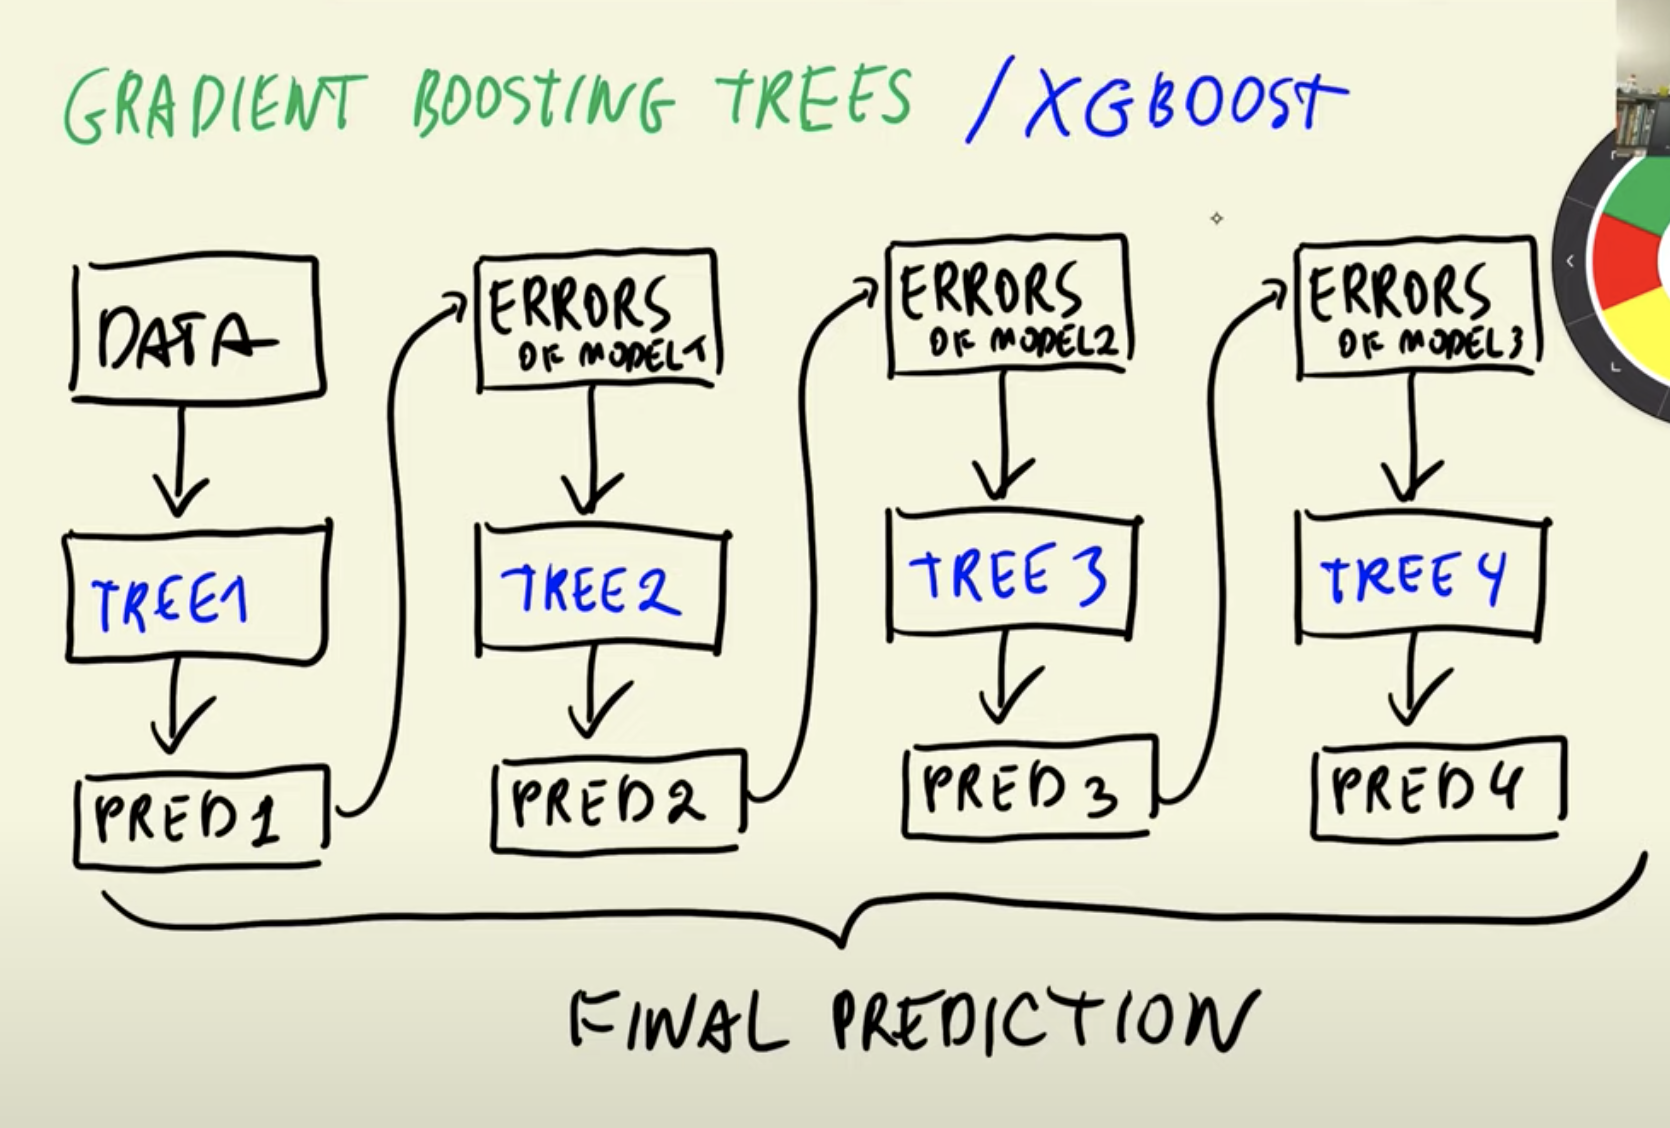

In [495]:
!pip install xgboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 4.4 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip available: 22.1.2 -> 22.3
[notice] To update, run: pip install --upgrade pip


In [496]:
import xgboost as xgb

In [500]:
features = dv.get_feature_names()
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

In [508]:
xgb_params ={
    'eta':0.3,
    'max_depth':6,
    'min_child_weight':1,
    
    'objective':'binary:logistic',
    'nthread':8,
    
    'seed':1,
    'verbosity':1, 
}

model = xgb.train(xgb_params, dtrain, num_boost_round=10)


In [509]:
y_pred = model.predict(dval)

In [510]:
roc_auc_score(y_val, y_pred)

0.815943661971831

In [512]:
# now we will create a watch list to monitor our model in each iteration

watchlist = [(dtrain,'train'),(dval,'val')]


In [513]:
xgb_params ={
    'eta':0.3,
    'max_depth':6,
    'min_child_weight':1,
    'eval_metric':'auc',
    'objective':'binary:logistic',
    'nthread':8,
    
    'seed':1,
    'verbosity':1, 
}

model = xgb.train(xgb_params, 
                  dtrain, 
                  evals=watchlist,
                  num_boost_round=200)

[0]	train-auc:0.86374	val-auc:0.79611
[1]	train-auc:0.88402	val-auc:0.80635
[2]	train-auc:0.90128	val-auc:0.80743
[3]	train-auc:0.90924	val-auc:0.80398
[4]	train-auc:0.91666	val-auc:0.80352
[5]	train-auc:0.92668	val-auc:0.80962
[6]	train-auc:0.93463	val-auc:0.81208
[7]	train-auc:0.93755	val-auc:0.81324
[8]	train-auc:0.94190	val-auc:0.81500
[9]	train-auc:0.94753	val-auc:0.81594
[10]	train-auc:0.95099	val-auc:0.81826
[11]	train-auc:0.95394	val-auc:0.81944
[12]	train-auc:0.95754	val-auc:0.82101
[13]	train-auc:0.95885	val-auc:0.82289
[14]	train-auc:0.96245	val-auc:0.82078
[15]	train-auc:0.96695	val-auc:0.82003
[16]	train-auc:0.96863	val-auc:0.82079
[17]	train-auc:0.97069	val-auc:0.82100
[18]	train-auc:0.97250	val-auc:0.82011
[19]	train-auc:0.97452	val-auc:0.81955
[20]	train-auc:0.97640	val-auc:0.82091
[21]	train-auc:0.97792	val-auc:0.81986
[22]	train-auc:0.97889	val-auc:0.82002
[23]	train-auc:0.98001	val-auc:0.82048
[24]	train-auc:0.98125	val-auc:0.82041
[25]	train-auc:0.98195	val-auc:0.82

In [514]:
#now if you want to print it each some steps

xgb_params ={
    'eta':0.3,
    'max_depth':6,
    'min_child_weight':1,
    'eval_metric':'auc',
    'objective':'binary:logistic',
    'nthread':8,
    
    'seed':1,
    'verbosity':1, 
}

model = xgb.train(xgb_params, 
                  dtrain, 
                  evals=watchlist,
                  verbose_eval=5,
                  num_boost_round=200)

[0]	train-auc:0.86374	val-auc:0.79611
[5]	train-auc:0.92668	val-auc:0.80962
[10]	train-auc:0.95099	val-auc:0.81826
[15]	train-auc:0.96695	val-auc:0.82003
[20]	train-auc:0.97640	val-auc:0.82091
[25]	train-auc:0.98195	val-auc:0.82072
[30]	train-auc:0.98544	val-auc:0.81811
[35]	train-auc:0.98990	val-auc:0.81436
[40]	train-auc:0.99338	val-auc:0.81523
[45]	train-auc:0.99427	val-auc:0.81426
[50]	train-auc:0.99548	val-auc:0.81512
[55]	train-auc:0.99661	val-auc:0.81497
[60]	train-auc:0.99749	val-auc:0.81460
[65]	train-auc:0.99784	val-auc:0.81406
[70]	train-auc:0.99827	val-auc:0.81475
[75]	train-auc:0.99897	val-auc:0.81372
[80]	train-auc:0.99952	val-auc:0.81179
[85]	train-auc:0.99980	val-auc:0.81203
[90]	train-auc:0.99986	val-auc:0.81140
[95]	train-auc:0.99995	val-auc:0.81325
[100]	train-auc:0.99997	val-auc:0.81370
[105]	train-auc:0.99997	val-auc:0.81249
[110]	train-auc:0.99998	val-auc:0.81264
[115]	train-auc:1.00000	val-auc:0.81077
[120]	train-auc:1.00000	val-auc:0.80940
[125]	train-auc:1.0000

In [546]:
%%capture output

#now if you want to print it each some steps
# and capture the output in a string 

xgb_params ={
    'eta':0.05,
    'max_depth':6,
    'min_child_weight':1,
    'eval_metric':'auc',
    'objective':'binary:logistic',
    'nthread':8,
    
    'seed':1,
    'verbosity':1, 
}

model = xgb.train(xgb_params, 
                  dtrain, 
                  evals=watchlist,
                  verbose_eval=5,
                  num_boost_round=200)




In [521]:
## to see the output
print(output.stdout)

[0]	train-auc:0.86374	val-auc:0.79611
[5]	train-auc:0.92668	val-auc:0.80962
[10]	train-auc:0.95099	val-auc:0.81826
[15]	train-auc:0.96695	val-auc:0.82003
[20]	train-auc:0.97640	val-auc:0.82091
[25]	train-auc:0.98195	val-auc:0.82072
[30]	train-auc:0.98544	val-auc:0.81811
[35]	train-auc:0.98990	val-auc:0.81436
[40]	train-auc:0.99338	val-auc:0.81523
[45]	train-auc:0.99427	val-auc:0.81426
[50]	train-auc:0.99548	val-auc:0.81512
[55]	train-auc:0.99661	val-auc:0.81497
[60]	train-auc:0.99749	val-auc:0.81460
[65]	train-auc:0.99784	val-auc:0.81406
[70]	train-auc:0.99827	val-auc:0.81475
[75]	train-auc:0.99897	val-auc:0.81372
[80]	train-auc:0.99952	val-auc:0.81179
[85]	train-auc:0.99980	val-auc:0.81203
[90]	train-auc:0.99986	val-auc:0.81140
[95]	train-auc:0.99995	val-auc:0.81325
[100]	train-auc:0.99997	val-auc:0.81370
[105]	train-auc:0.99997	val-auc:0.81249
[110]	train-auc:0.99998	val-auc:0.81264
[115]	train-auc:1.00000	val-auc:0.81077
[120]	train-auc:1.00000	val-auc:0.80940
[125]	train-auc:1.0000

In [524]:
# to work with the output

s = output.stdout
line = s.split('\n')
print(line[0])

[0]	train-auc:0.86374	val-auc:0.79611


In [526]:
line[0].split('\t')

['[0]', 'train-auc:0.86374', 'val-auc:0.79611']

In [527]:
def parse_xgb_output(output):
    result = []
    
    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')
        
        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])
        
        result.append((it, train, val))
       
        
    cols = ['num_iter','train_auc','val_auc']
    df_results = pd.DataFrame(result, columns=cols)
    return df_results

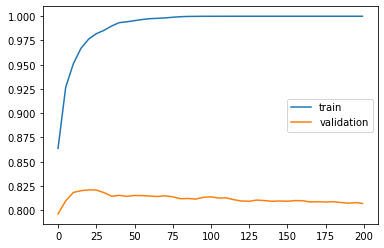

In [532]:
df_boosting = parse_xgb_output(output)
plt.plot(df_boosting.num_iter, df_boosting.train_auc, label='train')
plt.plot(df_boosting.num_iter, df_boosting.val_auc, label='validation')
plt.legend()

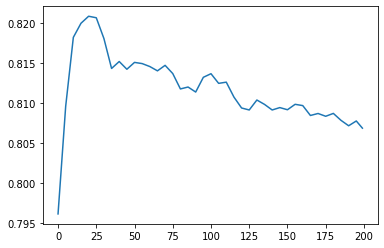

In [533]:
plt.plot(df_boosting.num_iter, df_boosting.val_auc, label='validation')


# XGBoost parameter tuning

- eta -> learning rate
- max_depth
- min_child_weight

In [534]:
scores = {}


In [549]:
%%capture output

#now if you want to print it each some steps
# and capture the output in a string 

xgb_params ={
    'eta':0.1,
    'max_depth':6,
    'min_child_weight':1,
    'eval_metric':'auc',
    'objective':'binary:logistic',
    'nthread':8,
    
    'seed':1,
    'verbosity':1, 
}

model = xgb.train(xgb_params, 
                  dtrain, 
                  evals=watchlist,
                  verbose_eval=5,
                  num_boost_round=200)




In [555]:
# here we are filling a dict with the values of the booting at
# different learning rates

etas = ['eta=0.01','eta=0.05','eta=0.1','eta=0.15','eta=0.5','eta=0.9',]

key = 'eta=%s'% (xgb_params['eta'])
scores[key] = parse_xgb_output(output)

In [556]:
scores['eta=0.01']

num_iter  train_auc  val_auc
0          0    0.86374  0.79611
1          5    0.86615  0.79785
2         10    0.86969  0.79646
3         15    0.87256  0.79677
4         20    0.87536  0.79939
5         25    0.87902  0.80078
6         30    0.88361  0.80433
7         35    0.88743  0.80617
8         40    0.89108  0.80962
9         45    0.89395  0.81100
10        50    0.89553  0.81287
11        55    0.89734  0.81382
12        60    0.89898  0.81364
13        65    0.90109  0.81230
14        70    0.90312  0.81058
15        75    0.90500  0.81032
16        80    0.90620  0.81167
17        85    0.90771  0.81209
18        90    0.90902  0.81109
19        95    0.91016  0.81097
20       100    0.91146  0.81087
21       105    0.91263  0.81060
22       110    0.91396  0.81049
23       115    0.91571  0.81104
24       120    0.91716  0.81128
25       125    0.91866  0.81088
26       130    0.92009  0.81095
27       135    0.92148  0.81067
28       140    0.92250  0.81074
29       145    0.92345  0.81091
30       150    0.92467  0.81181
31       155    0.92555  0.81260
32       160    0.92638  0.81278
33       165    0.92714  0.81308
34       170    0.92813  0.81303
35       175    0.92892  0.81314
36       180    0.92985  0.81348
37       185    0.93062  0.81364
38       190    0.93161  0.81371
39       195    0.93235  0.81387
40       199    0.93303  0.81422

In [557]:
scores.keys()

dict_keys(['eta=0.3', 'eta=0.9', 'eta=0.1', 'eta=0.05', 'eta=0.01'])

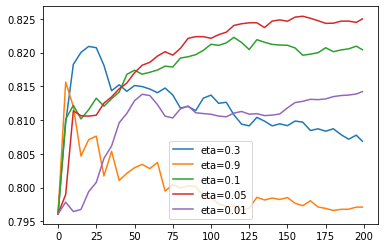

In [558]:
for key, df_scores in scores.items():
    plt.plot(df_scores.num_iter, df_scores.val_auc, label=key)
    
plt.legend()

In [567]:
scores = {}


In [583]:
%%capture output

# now we select the best one

#now if you want to print it each some steps
# and capture the output in a string 

xgb_params ={
    'eta':0.1,
    'max_depth':10,
    'min_child_weight':1,
    'eval_metric':'auc',
    'objective':'binary:logistic',
    'nthread':8,
    
    'seed':1,
    'verbosity':1, 
}

model = xgb.train(xgb_params, 
                  dtrain, 
                  evals=watchlist,
                  verbose_eval=5,
                  num_boost_round=200)




# now we are going to tuning max_depth

In [587]:
# here we are filling a dict with the values of the booting at
# different learning rates

max_depth = ['max_depth=3','max_depth=5','max_depth=6','max_depth=8','max_depth=10',]

key = 'max_depth=%s'% (xgb_params['max_depth'])
scores[key] = parse_xgb_output(output)


In [586]:
#del scores['max_depth=1']

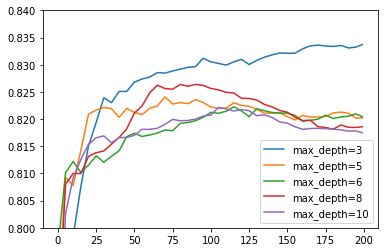

In [589]:
for max_depth, df_scores in scores.items():
    plt.plot(df_scores.num_iter, df_scores.val_auc, label=max_depth)

plt.ylim(0.8,0.84)
plt.legend()

# the best max_depth is 3

# now we are going to tuning the min_child_weight

In [590]:
scores = {}


In [603]:
%%capture output

# now we select the best one

#now if you want to print it each some steps
# and capture the output in a string 

xgb_params ={
    'eta':0.1,
    'max_depth':3,
    'min_child_weight':9,
    'eval_metric':'auc',
    'objective':'binary:logistic',
    'nthread':8,
    
    'seed':1,
    'verbosity':1, 
}

model = xgb.train(xgb_params, 
                  dtrain, 
                  evals=watchlist,
                  verbose_eval=5,
                  num_boost_round=200)

In [604]:
# here we are filling a dict with the values of the booting at
# different learning rates

min_child_weight = ['min_child_weight=1',
             "min_child_weight=3",
             'min_child_weight=5',
             'min_child_weight=9']

key = 'min_child_weight=%s'% (xgb_params['min_child_weight'])
scores[key] = parse_xgb_output(output)

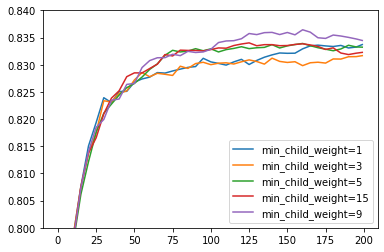

In [606]:
for min_child_weight, df_scores in scores.items():
    plt.plot(df_scores.num_iter, 
             df_scores.val_auc, 
             label=min_child_weight)

plt.ylim(0.8,0.84)
plt.legend()

In [608]:
xgb_params ={
    'eta':0.1,
    'max_depth':3,
    'min_child_weight':9,
    'eval_metric':'auc',
    'objective':'binary:logistic',
    'nthread':8,
    
    'seed':1,
    'verbosity':1, 
}

model = xgb.train(xgb_params, 
                  dtrain, 
                  verbose_eval=5,
                  num_boost_round=175)

In [610]:
y_pred = model.predict(dval)

In [611]:
roc_auc_score(y_val, y_pred)

0.8347840375586854

# selecting the best model


In [612]:
dt = DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)

dt.fit(X_train, y_train) 

DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)

In [617]:
y_pred = dt.predict_proba(X_val)[:,1]
roc_auc_score(y_val, y_pred)

0.783431924882629

In [614]:
rf = RandomForestClassifier(n_estimators=200,
                           max_depth=10,
                           min_samples_leaf=3,
                           random_state=1)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=3, n_estimators=200,
                       random_state=1)

In [618]:
y_pred = rf.predict_proba(X_val)[:,1]
roc_auc_score(y_val, y_pred)

0.8276197183098591

In [616]:
xgb_params ={
    'eta':0.1,
    'max_depth':3,
    'min_child_weight':9,
    'eval_metric':'auc',
    'objective':'binary:logistic',
    'nthread':8,
    
    'seed':1,
    'verbosity':1, 
}

model = xgb.train(xgb_params, 
                  dtrain, 
                  verbose_eval=5,
                  num_boost_round=200)

In [619]:
y_pred = model.predict(dval)
roc_auc_score(y_val, y_pred)

0.8344647887323944

# watch again

https://www.youtube.com/watch?v=lqdnyIVQq-M&list=PL3MmuxUbc_hIhxl5Ji8t4O6lPAOpHaCLR&index=65



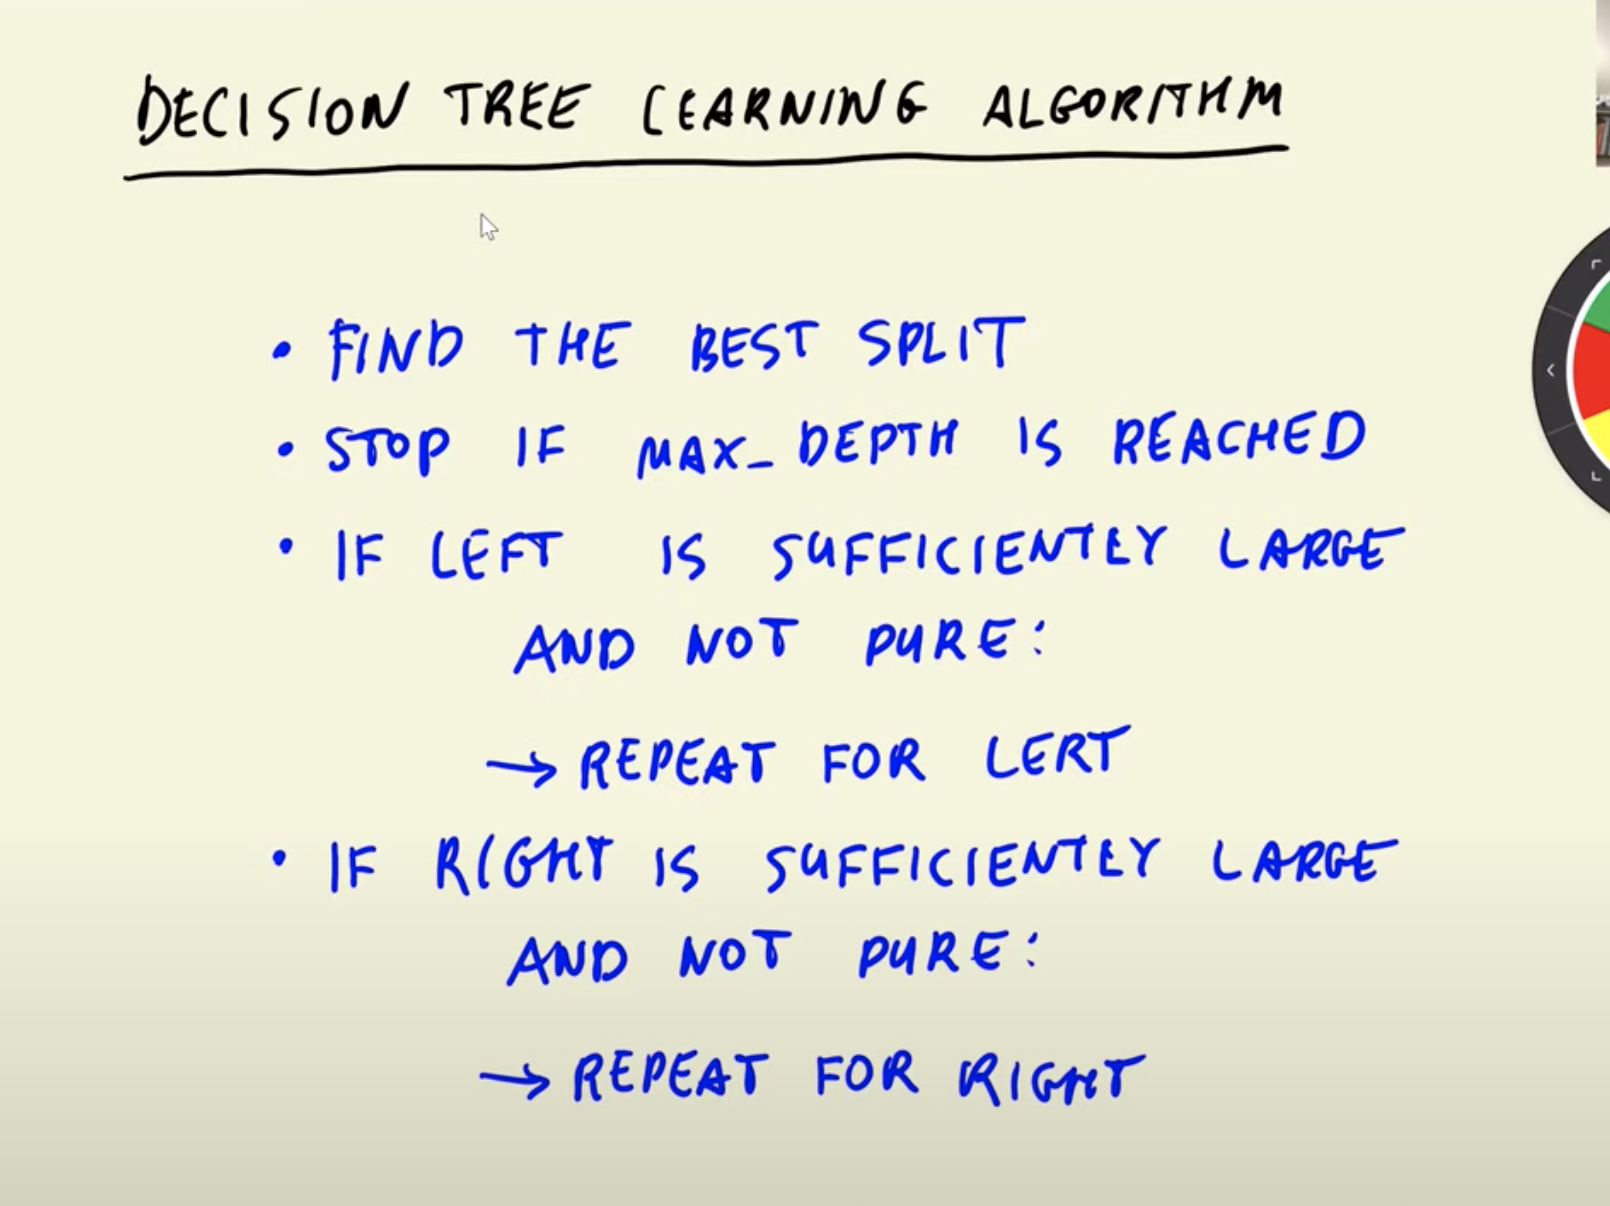